# Experiment 8 - Modelling Medical Data with a Bayesian Network

## Import libraries

In [54]:
import pandas as pd
import bnlearn as bn
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

## Read Data from `.csv` File

In [55]:
data = pd.read_csv(r'./data.csv')
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,1,110,264,0,0,132,0,1.2,2,0,7,1
299,68,1,4,144,193,1,0,141,0,3.4,2,2,7,2
300,57,1,4,130,131,0,0,115,1,1.2,2,1,7,3
301,57,0,2,130,236,0,2,174,0,0.0,2,1,3,1


## Exploring the Data

In [56]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')

In [57]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    object 
 12  thal      303 non-null    object 
 13  num       303 non-null    int64  
dtypes: float64(1), int64(11), object(2)
memory usage: 33.3+ KB


In [58]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,num
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,4.000000


## Extracting `X` and `y`

In [59]:
X = data.iloc[:, :-1]
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,1,110,264,0,0,132,0,1.2,2,0,7
299,68,1,4,144,193,1,0,141,0,3.4,2,2,7
300,57,1,4,130,131,0,0,115,1,1.2,2,1,7
301,57,0,2,130,236,0,2,174,0,0.0,2,1,3


In [60]:
y = data['num']
y

0      0
1      2
2      1
3      0
4      0
      ..
298    1
299    2
300    3
301    1
302    0
Name: num, Length: 303, dtype: int64

## Train-test Split

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, random_state=42)

In [63]:
training = pd.concat([X_train, y_train], axis='columns')
testing = pd.concat([X_test, y_test], axis='columns')

## Plotting Bayesian Network

[bnlearn] >Warning: Computing DAG with 14 nodes can take a very long time!
[bnlearn] >Computing best DAG using [hc]
[bnlearn] >Set scoring type at [bic]
[bnlearn] >Compute structure scores ['k2', 'bds', 'bic', 'bdeu'] for model comparison (higher is better).
[bnlearn] >Set node properties.
[bnlearn] >Set edge properties.
[bnlearn] >Plot based on Bayesian model


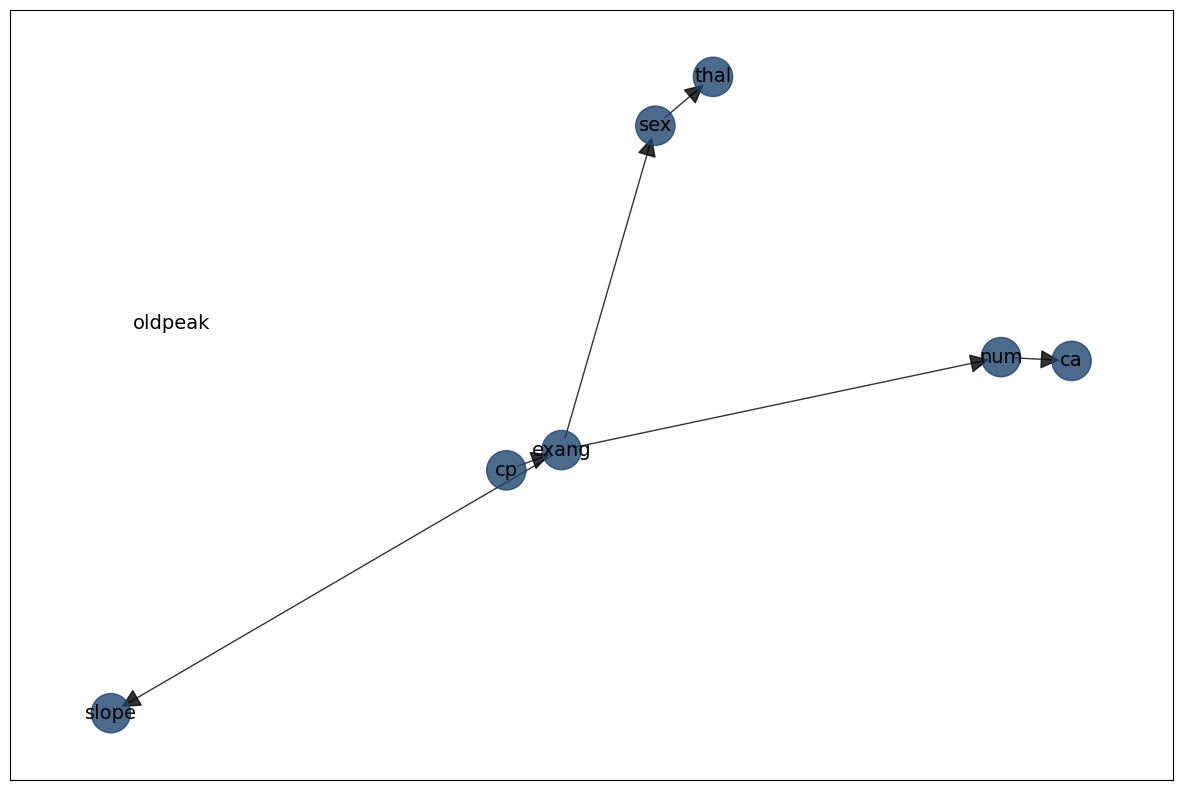

[bnlearn] >Parameter learning> Computing parameters using [bayes]
[bnlearn] >Converting [<class 'pgmpy.base.DAG.DAG'>] to BayesianNetwork model.
[bnlearn] >Converting adjmat to BayesianNetwork.
[bnlearn] >CPD of sex:
+--------+--------------------+---------------------+
| exang  | exang(0)           | exang(1)            |
+--------+--------------------+---------------------+
| sex(0) | 0.4760432766615147 | 0.46379310344827585 |
+--------+--------------------+---------------------+
| sex(1) | 0.5239567233384853 | 0.5362068965517242  |
+--------+--------------------+---------------------+
[bnlearn] >CPD of thal:
+---------+---------------------+---------------------+
| sex     | sex(0)              | sex(1)              |
+---------+---------------------+---------------------+
| thal(3) | 0.32582322357019067 | 0.2876923076923077  |
+---------+---------------------+---------------------+
| thal(6) | 0.21837088388214904 | 0.2123076923076923  |
+---------+---------------------+------------

In [67]:
DAG = bn.structure_learning.fit(training, methodtype='hc', root_node='sex', bw_list_method='nodes', verbose=3)

# Plot
G = bn.plot(DAG)

# Parameter learning
model = bn.parameter_learning.fit(DAG, training, verbose=3)

In [ ]:
model

{'model': <pgmpy.models.BayesianNetwork.BayesianNetwork at 0x7fba61775750>,
 'adjmat': target      age    sex     cp  trestbps   chol    fbs  restecg  thalach  \
 source                                                                    
 age       False  False  False     False  False  False    False    False   
 sex       False  False  False     False  False  False    False    False   
 cp        False  False  False     False  False  False    False    False   
 trestbps  False  False  False     False  False  False    False    False   
 chol      False  False  False     False  False  False    False    False   
 fbs       False  False  False     False  False  False    False    False   
 restecg   False  False  False     False  False  False    False    False   
 thalach   False  False  False     False  False  False    False    False   
 exang     False   True  False     False  False  False    False    False   
 oldpeak   False  False  False     False  False  False    False    False   
 s